In [81]:
import numpy as np
from numba import jit
from timeit import timeit
import matplotlib.pyplot as plt

In [82]:
# Luo vektorit NumPy-pohjaista ajonottoa varten.

a_array = np.random.randn(10**3)
b_array = np.random.randn(10**3)

# Luo listat NumPy-pohjaista ajonottoa varten.

a_list = list(a_array)
b_list = list(b_array)

In [83]:
# Tulostetaan kaikista ensimmäiset 10, jotta nähdään, että sisältävät lukuja. 

print("NumPy a_array (head):\n", a_array[:10])
print("NumPy b_array (head):\n", b_array[:10])
print("\na_list (head):\n", a_list[:10])
print("\nb_list (head):\n", b_list[:10])

NumPy a_array (head):
 [-0.65021302  0.14391285  0.14741304  1.63629234 -0.49571756 -0.115643
 -0.32677316 -0.07672179 -0.52636041  0.5627449 ]
NumPy b_array (head):
 [ 1.00565732  1.03836827  2.12371791 -1.46477323 -1.19163686  0.04628054
  1.91699408 -1.59641069  0.78499045  1.00267239]

a_list (head):
 [-0.6502130209420357, 0.14391285431573614, 0.1474130428505866, 1.6362923449530045, -0.49571755643372717, -0.11564299920234668, -0.32677316291733904, -0.07672179487515916, -0.5263604093699785, 0.5627449016544727]

b_list (head):
 [1.0056573185672428, 1.0383682664991438, 2.123717908389228, -1.4647732271716836, -1.191636857377996, 0.04628053977197214, 1.9169940800888798, -1.5964106900626478, 0.784990449842325, 1.002672385641151]


In [84]:
def dot(a, b):
    """
    Takes two vectors as a parameter and returns their dot product.
    Param: array-like floats
    Return: float
    """
    
    dot_product = 0
    for a, b in zip(a, b):
        dot_product += a * b
    
    return dot_product

In [85]:
@jit(nopython=True)
def dot_numba(a, b):
    """
    Takes two vectors as a parameter and returns their dot product.
    Param: array-like floats
    Return: float
    """
    
    dot_product = 0
    for a, b in zip(a, b):
        dot_product += a * b
    
    return dot_product

In [86]:
# Make function for NumPy's dot product, which can then be Numba compiled.

@jit(nopython=True)
def dot_np_numba(a, b):
    return np.dot(a, b)

In [87]:
n = 1000

In [88]:
# dot-funktion ajo listoilla 
list_time = timeit(lambda: dot(a_list, b_list), number=10000)

print(((list_time * n) / 10), "ms")

224.75988000001053 ms


In [89]:
# Vertailun vuoksi saman dot-funktion ajo NumPy-taulukoilla.
np_arr_time = timeit(lambda: dot(a_array, b_array), number=10000)

print(((np_arr_time * 1000) / 10), "ms")

312.7010600000176 ms


In [90]:
# Numban ensimmäinen ajo
numba_time = timeit(lambda: dot_numba(a_array, b_array), number=10000)

print(((numba_time * n) / 10), "ms")

14.204609999978857 ms


In [91]:
# Numban toinen ajo
numba_time = timeit(lambda: dot_numba(a_array, b_array), number=10000)

print(((numba_time * n) / 10), "ms")

1.8994800000200485 ms


In [92]:
# NumPyn oma dot-operaatio
numpy_time = timeit(lambda: np.dot(a_array, b_array), number=10000)

print(((numpy_time * n) / 10), "ms")

2.3025200000120094 ms


In [93]:
# Numba + NumPy ensimmäinen ajo
numba_plus_numpy_time = timeit(lambda: dot_np_numba(a_array, b_array), number=10000)

print(((numba_plus_numpy_time * n) / 10), "ms")

9.568549999994502 ms


In [94]:
# Numba + NumPy toinen ajo
numba_plus_numpy_time = timeit(lambda: dot_np_numba(a_array, b_array), number=10000)

print(((numba_plus_numpy_time * n) / 10), "ms")

0.8151499999712541 ms


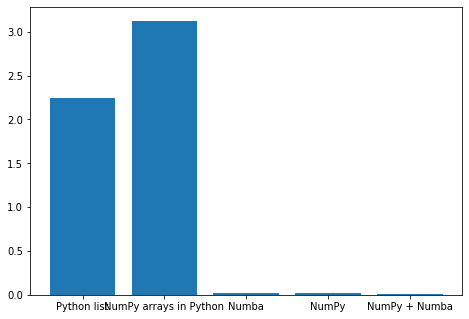

In [98]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['Python list','NumPy arrays in Python', 'Numba', 'NumPy', 'NumPy + Numba']
students = [list_time, np_arr_time, numba_time, numpy_time, numba_plus_numpy_time]
ax.bar(langs,students)
plt.show()

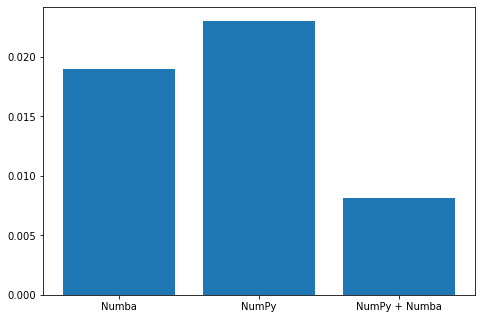

In [99]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['Numba', 'NumPy', 'NumPy + Numba']
students = [numba_time, numpy_time, numba_plus_numpy_time]
ax.bar(langs,students)
plt.show()